# Exploratory Data Analysis on Pizza Price
This project will be done using R.

This dataset contains data on various pizza shops, their pizza types, sizes, and its prices.

Objectives:
1. Check data structures and do feature engineering.
2. Measure the information gain from each variables. (feature selection)
3. Explore patterns and dimensions of each pizza types from different pizza stores.

In [1]:
library(plyr)
library(dplyr)
library(tidyverse)
#library(FSelector)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::ren

In [2]:
pizza <- read_csv('../input/pizza-price-prediction-real-data/pizza_data.csv', show_col_types = FALSE)

# Feature Engineering

In [3]:
str(pizza)

spec_tbl_df [371 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Company   : chr [1:371] "Domino's Pizza" "Domino's Pizza" "Domino's Pizza" "Domino's Pizza" ...
 $ Pizza Name: chr [1:371] "Hand Tossed" "Hand Tossed" "Hand Tossed" "Handmade Pan" ...
 $ Type      : chr [1:371] "Cheeses Pizza" "Cheeses Pizza" "Cheeses Pizza" "Cheeses Pizza" ...
 $ Size      : chr [1:371] "Small (10\")" "Medium (12\")" "Large (14\")" "Medium (12\")" ...
 $ Price     : chr [1:371] "$5.99" "$7.99" "$9.99" "$7.99" ...
 - attr(*, "spec")=
  .. cols(
  ..   Company = col_character(),
  ..   `Pizza Name` = col_character(),
  ..   Type = col_character(),
  ..   Size = col_character(),
  ..   Price = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


In [4]:
head(pizza, 15)

Company,Pizza Name,Type,Size,Price
<chr>,<chr>,<chr>,<chr>,<chr>
Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99
Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",$7.99
Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",$5.99
Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Medium (12"")",$7.99
Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Large (14"")",$9.99
Domino's Pizza,Brooklyn Style,Cheeses Pizza,"Large (14"")",$9.99
Domino's Pizza,Brooklyn Style,Cheeses Pizza,"X-Large (16"")",$11.99


In [5]:
#Change Characters variables to factor variables

pizza$Company <- as.factor(pizza$Company)
pizza$Type <- as.factor(pizza$Type)
pizza$Size <- as.factor(pizza$Size)

In [6]:
str(pizza)
summary(pizza)

spec_tbl_df [371 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Company   : Factor w/ 4 levels "Domino's Pizza",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Pizza Name: chr [1:371] "Hand Tossed" "Hand Tossed" "Hand Tossed" "Handmade Pan" ...
 $ Type      : Factor w/ 9 levels "Cheese Pizza",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Size      : Factor w/ 11 levels "Jumbo","Large",..: 9 5 3 5 9 5 3 3 11 9 ...
 $ Price     : chr [1:371] "$5.99" "$7.99" "$9.99" "$7.99" ...
 - attr(*, "spec")=
  .. cols(
  ..   Company = col_character(),
  ..   `Pizza Name` = col_character(),
  ..   Type = col_character(),
  ..   Size = col_character(),
  ..   Price = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


              Company     Pizza Name                           Type    
 Domino's Pizza   : 88   Length:371         Specialty Pizzas     :186  
 Godfather's Pizza:133   Class :character   Classic Recipe Pizzas: 90  
 IMO's Pizza      : 24   Mode  :character   Feast Pizzas         : 33  
 Pizza Hut        :126                      New Recipe Pizzas    : 21  
                                            Cheese Pizza         : 16  
                                            Cheeses Pizza        : 10  
                                            (Other)              : 15  
           Size        Price          
 Large       :111   Length:371        
 Medium      : 84   Class :character  
 Small (10") : 39   Mode  :character  
 Medium (12"): 27                     
 Large (14") : 24                     
 Small       : 20                     
 (Other)     : 66                     

In [7]:
summary(pizza$Size)

Jumbo         Large   Large (14")        Medium  Medium (12") 
           18           111            24            84            27 
         Mini      Personal         Small   Small (10") X Large (16") 
           14            12            20            39             6 
X-Large (16") 
           16

In [8]:
#Size of pizza factor have different names. Hence, I will group same size together Mini, Personal, Small, Medium, Large, X-Large, and Jumbo
Mini_Pizza <- data.frame(filter(pizza, grepl("mini",Size , ignore.case = TRUE)))
Personal_Pizza <- data.frame(filter(pizza, grepl("personal",Size , ignore.case = TRUE)))
Small_Pizza <- data.frame(filter(pizza, grepl("small",Size , ignore.case = TRUE)))
Medium_Pizza <- data.frame(filter(pizza, grepl("medium",Size , ignore.case = TRUE)))
Large_Pizza <- data.frame(filter(pizza, grepl("large",Size , ignore.case = TRUE), !grepl("X", Size, ignore.case = TRUE))) 
XLarge_Pizza <- data.frame(filter(pizza, grepl("X",Size , ignore.case = TRUE)))
Jumbo_Pizza <- data.frame(filter(pizza, grepl("jumbo",Size , ignore.case = TRUE)))

#I will add another column that contains measurement in inch of each type of pizza
#pizza <- mutate(pizza, size=ifelse())

In [9]:
head(Large_Pizza,5)

,Company,Pizza.Name,Type,Size,Price
,<fct>,<chr>,<fct>,<fct>,<chr>
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
2,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Large (14"")",$9.99
3,Domino's Pizza,Brooklyn Style,Cheeses Pizza,"Large (14"")",$9.99
4,Domino's Pizza,"Spinach & Feta (Hand Tossed, Thin Crust or Brooklyn Style)",Specialty Pizzas,"Large (14"")",$15.99
5,Domino's Pizza,"Wisconsin 6 Cheese (Hand Tossed, Thin Crust or Brooklyn Style)",Specialty Pizzas,"Large (14"")",$15.99


In [10]:
summary(pizza$Type)

Cheese Pizza         Cheeses Pizza Classic Recipe Pizzas 
                   16                    10                    90 
    Express Favorites          Feast Pizzas    Gluten-Free Pizzas 
                    7                    33                     3 
    New Recipe Pizzas         Skinny Pizzas      Specialty Pizzas 
                   21                     5                   186

In [11]:
#Some of the same Pizza Type is named didderently, I will rename the types to standard ones
pizza$Type <- revalue(pizza$Type, c("Cheese Pizza" = "Cheeses Pizza"))

In [12]:
#Check if there are any missing values
sum(is.na(pizza))

#There are no missing values

[1] 0

In [13]:
#Change data type of price to float
pizza[] <- lapply(pizza, gsub, pattern = "$", fixed = TRUE, replacement = "")
pizza$Price <- as.numeric(pizza$Price)

# Information Gain from Features

In [14]:
#pizza_info_type <- information.gain(Type~., pizza)
#print(pizza_info_type)

#Every features have some information gain to identifying if the pizza is in which type
#Hence, if we want to do classification wit this dataset, we do not need to drop any variables

In [15]:
#pizza_df <- pizza_info_type
#pizza_df$type_info <- rownames(pizza_info_type)
#pizza_df <- arrange(pizza_df, -attr_importance)

In [16]:
#barplot(pizza_df$attr_importance, name=pizza_df$type_info, las=2, ylim = c(0, 1.7))
#we can see that pizza name gives the most information of whether that pizza is in what type

# Exploratory Data Analysis

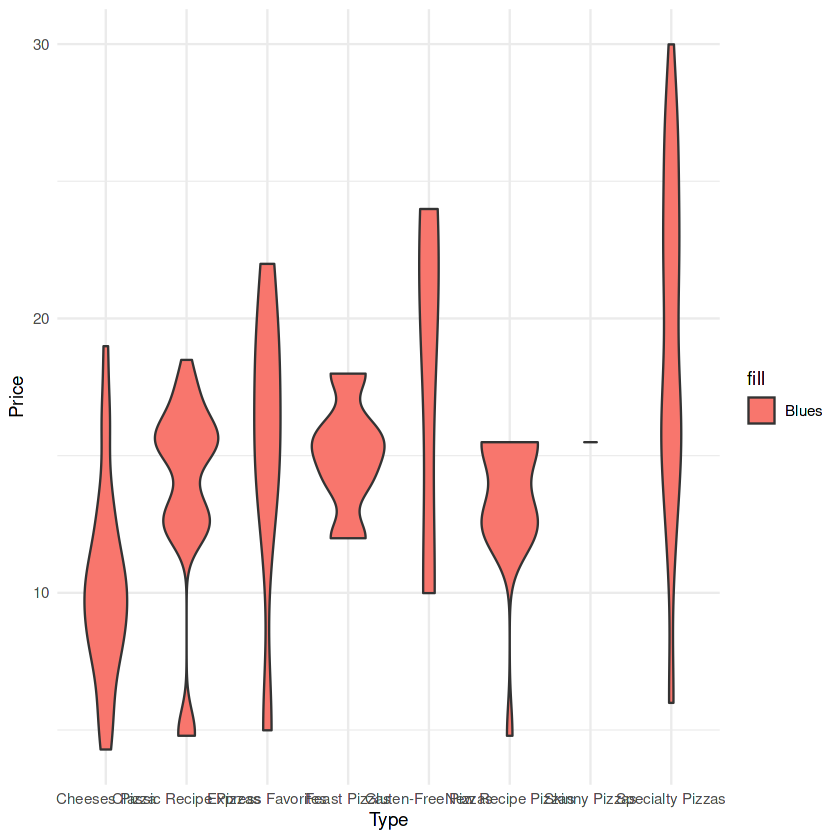

In [17]:
ggplot(pizza) + geom_violin(aes(x=Type, y=Price, fill="Blues")) + theme_minimal()
options(repr.plot.width=25, repr.plot.height=15)

#Skinny Pizza tends to be in similar price, while Specialtypizza from different place and different types tend to be equially distributed through different price points
#Cheeses, classic recipe, feast, and new recipe pizza all have range of price point where most restaurans stick with
#Express favourite and glutin-free pizzas have a more equal distribution of price

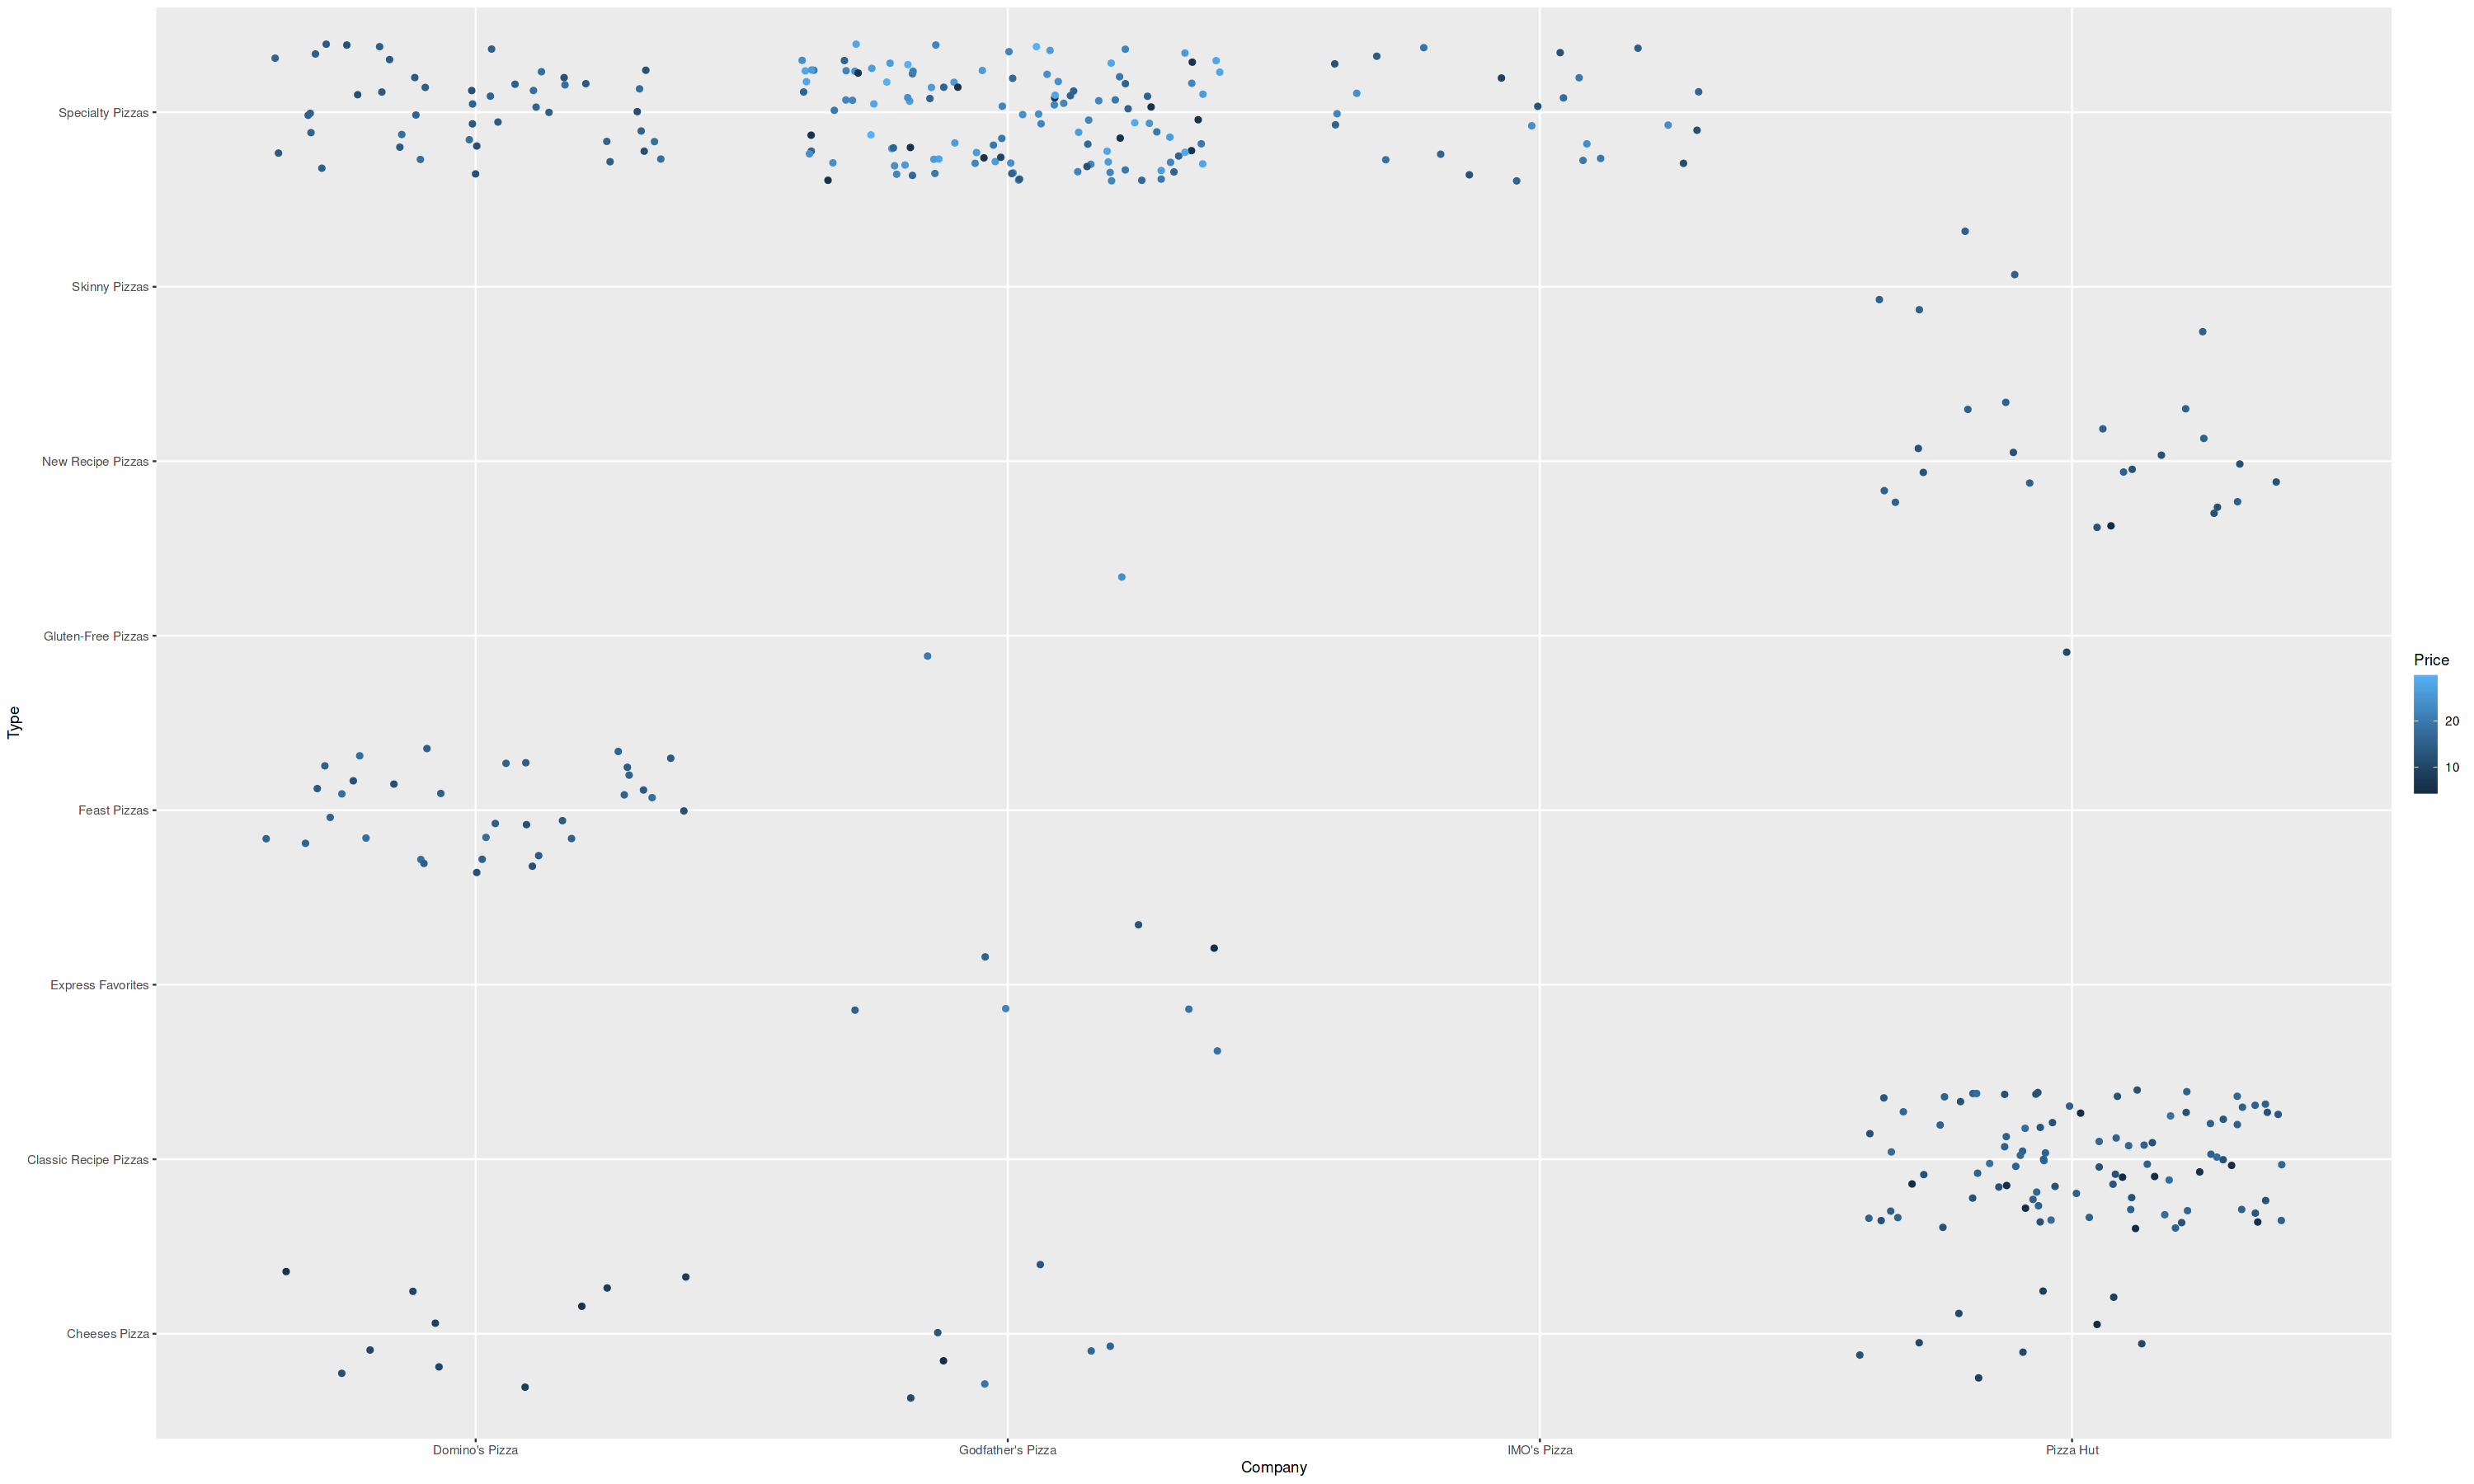

In [18]:
ggplot(pizza) + geom_jitter(aes(x=Company, y=Type, colour=Price))

#IMO's Pizza specialises in Specialty Pizzas only
#Domino's Pizza, Godfather's Pizza and Pizza Hut all have variety range of pizza types sold. This might be due to their large company size.
#Only Pizza Hut does Skinny Pizza
#Only Domino's Pizza does Feast Pizza
#We could not conclude that this is other pizza place doesnt have Feast Pizzas too as they may call it a different type.

In [19]:
summary(pizza$Company)

   Length     Class      Mode 
      371 character character 

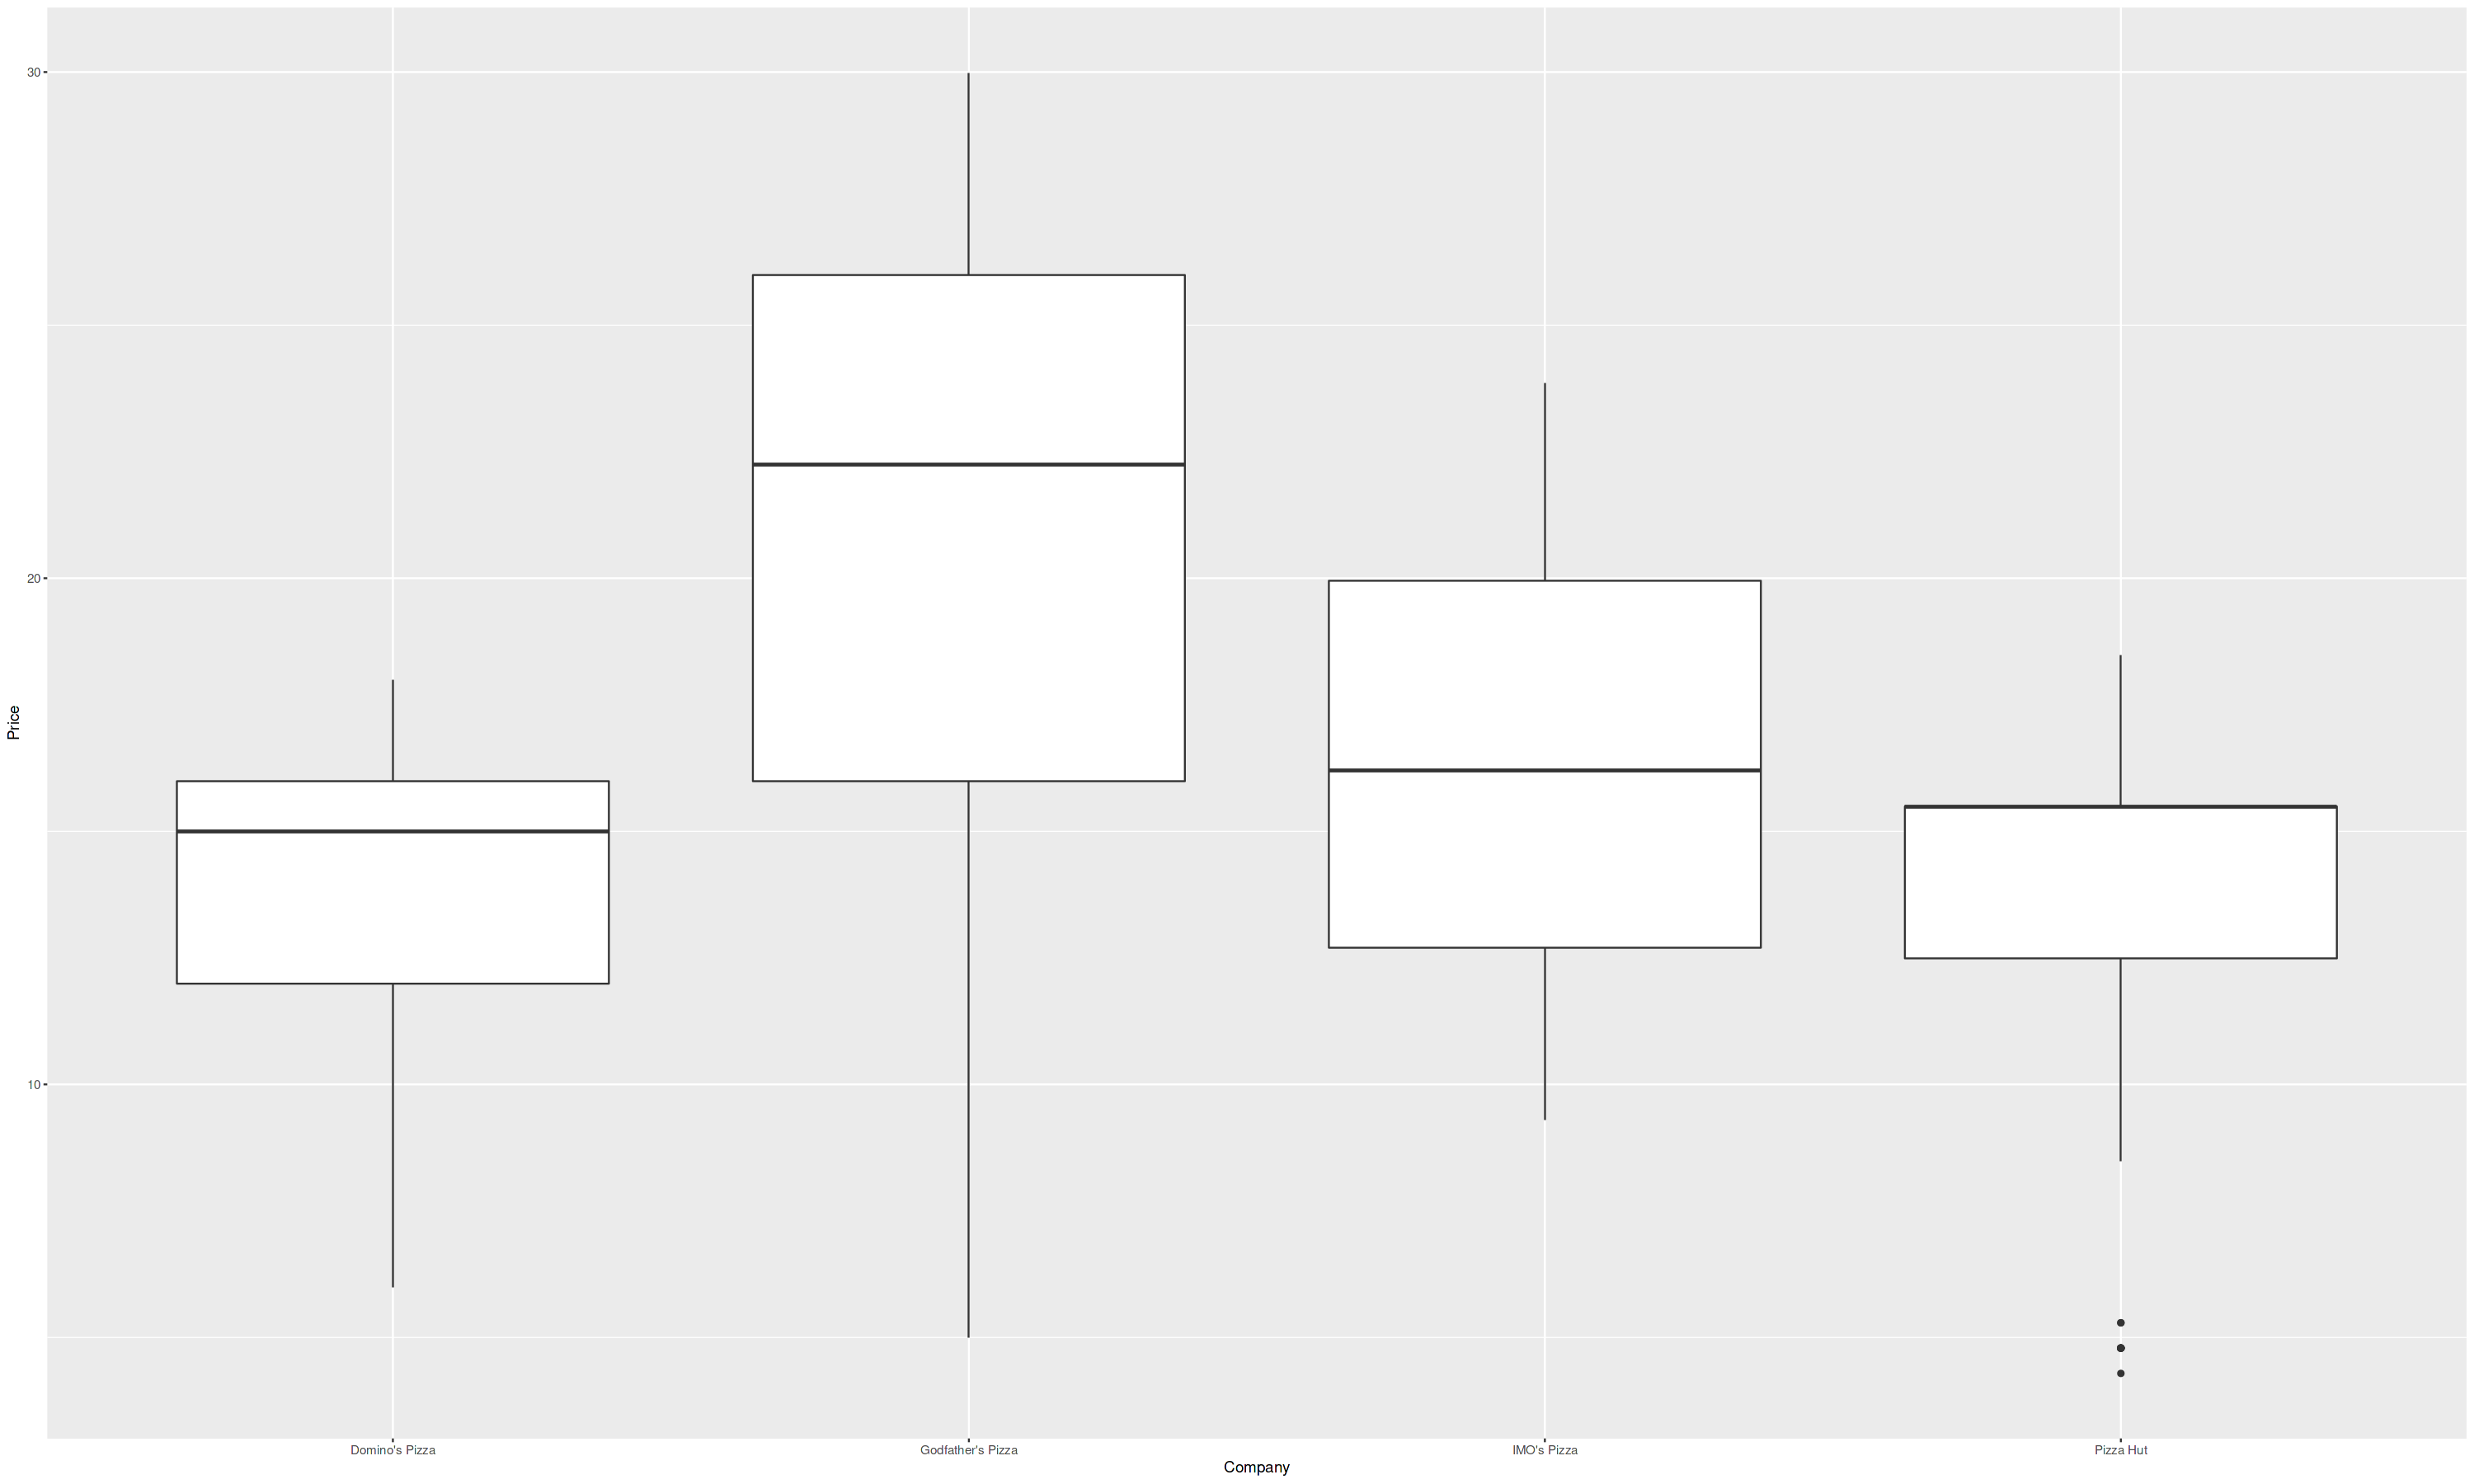

In [20]:
ggplot(pizza) + geom_boxplot(aes(x=Company, y=Price))

#Godfather's Pizza has a highest average pizza price, while Domino's Pizza has a lowest average pizza.
#This could be due to the economies of scale Domino's Pizza has.

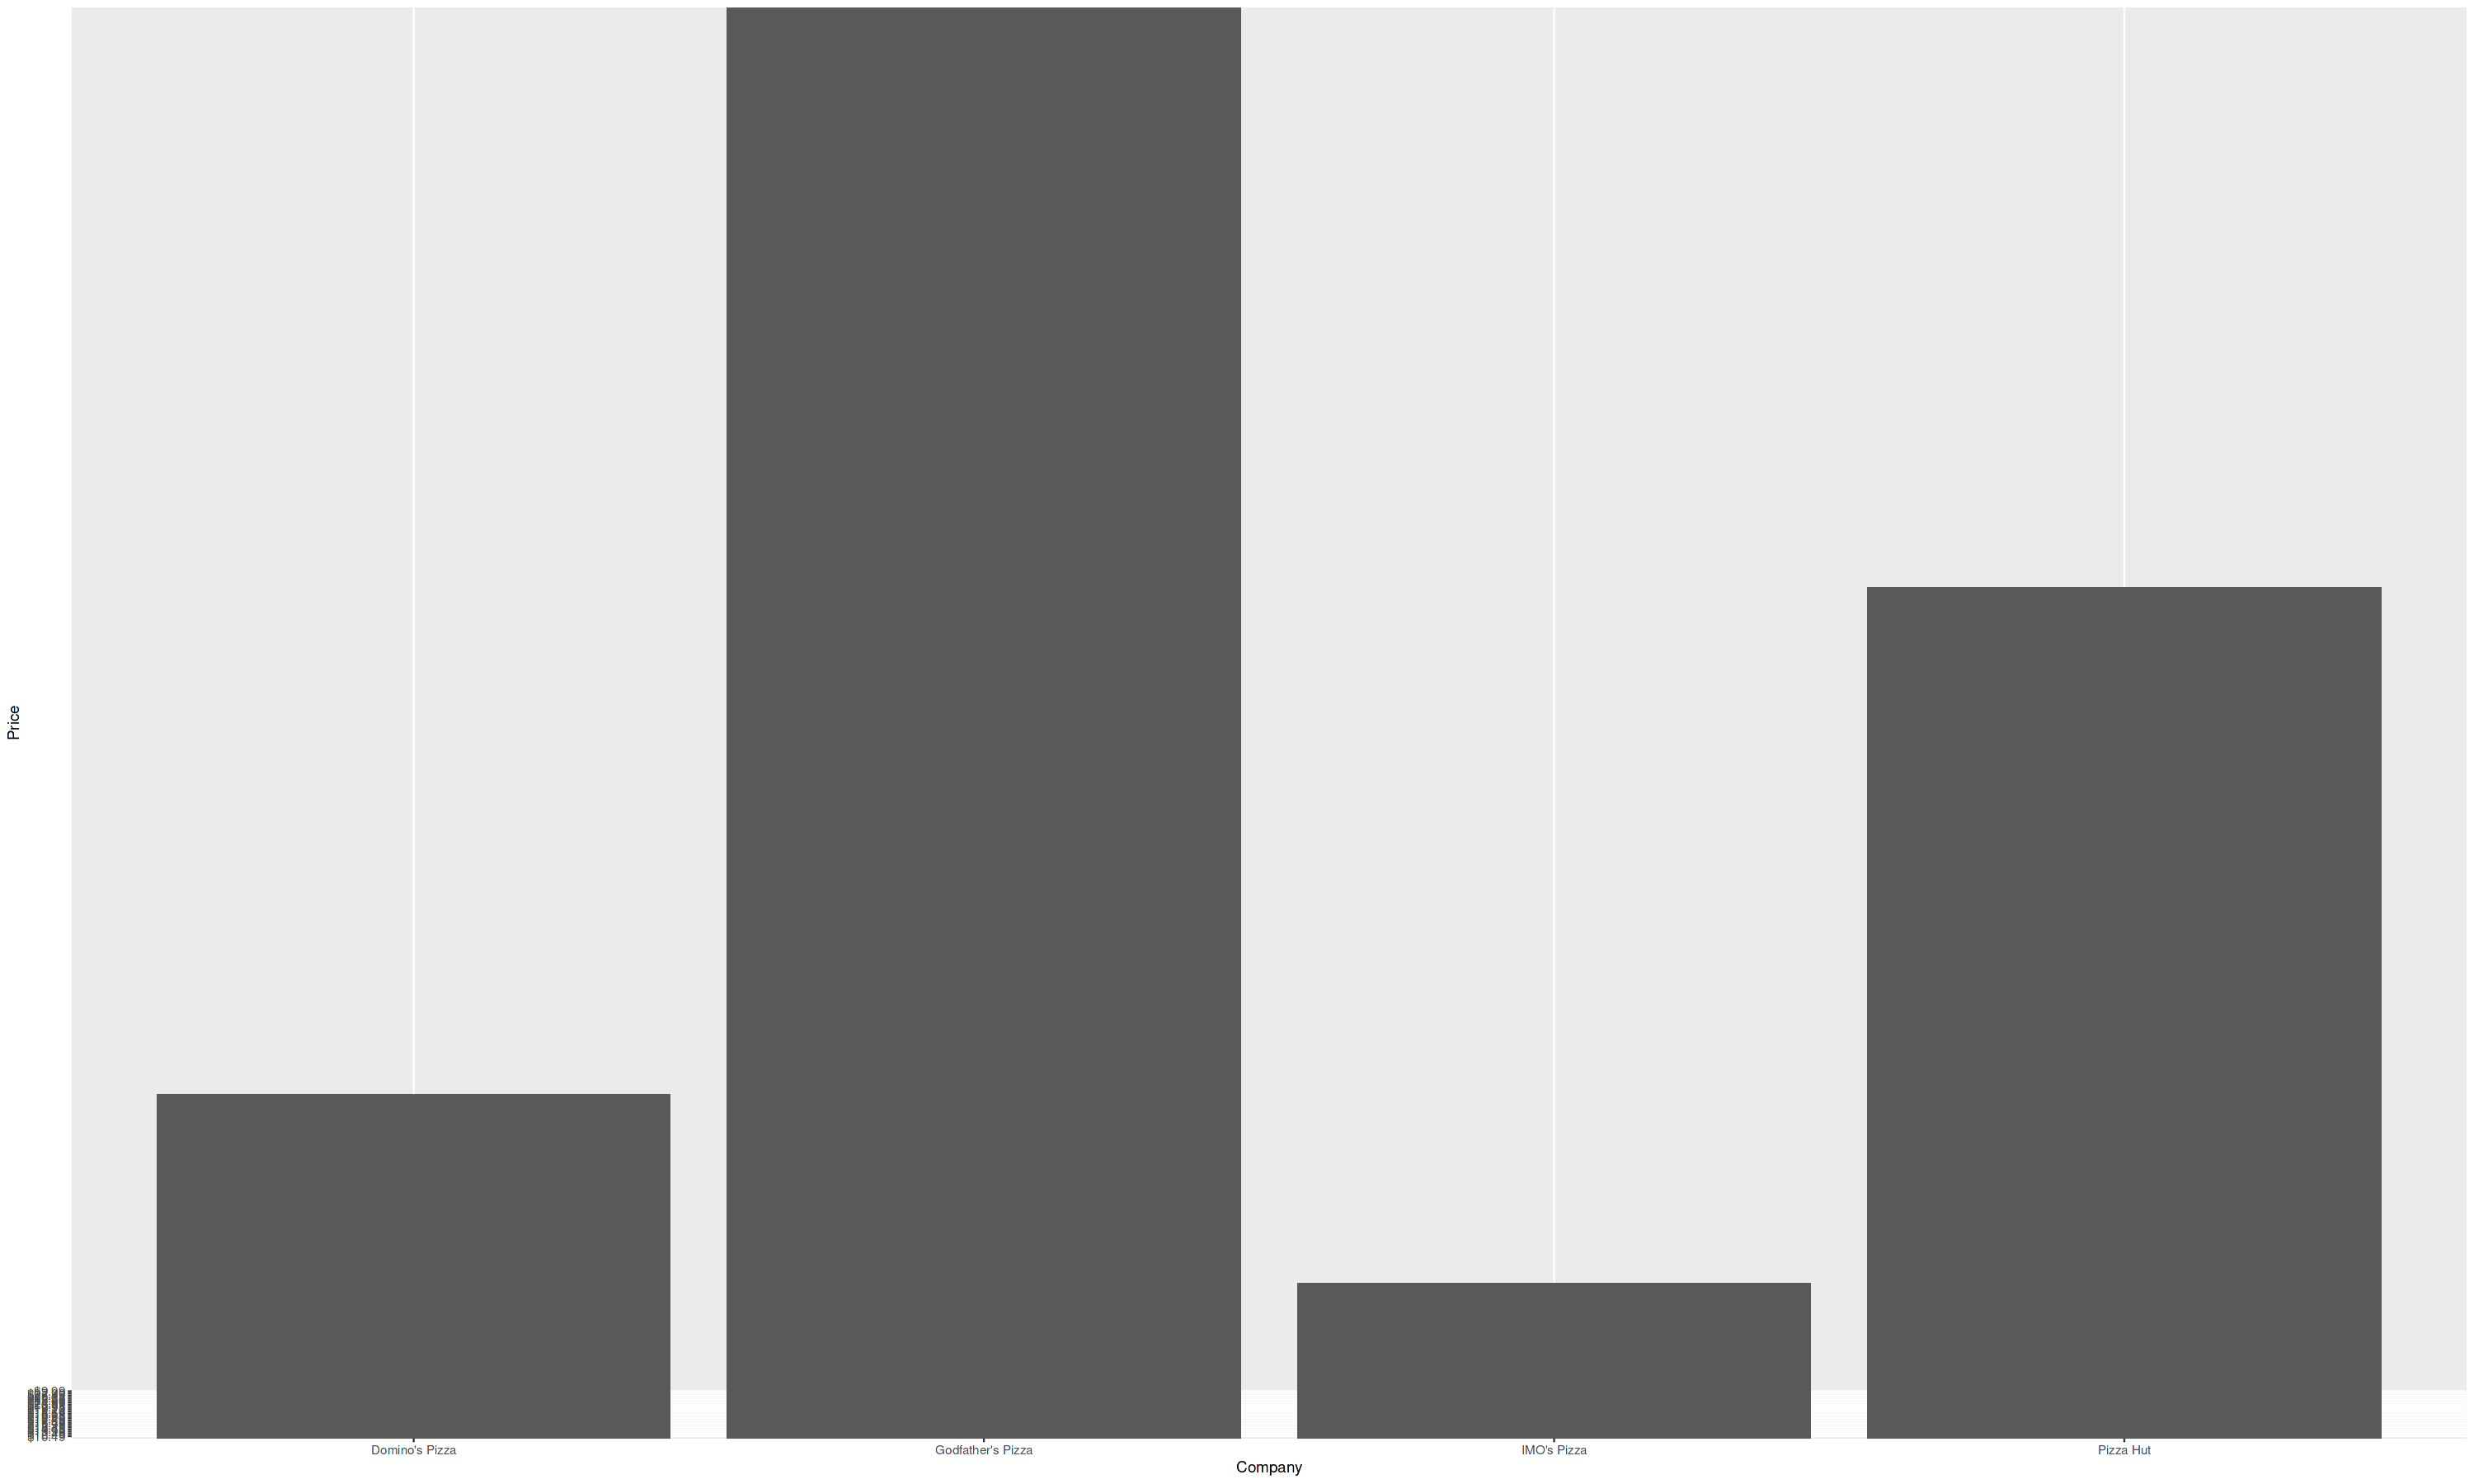

In [21]:
ggplot(Large_Pizza) + geom_col(aes(x=Company, y=Price))

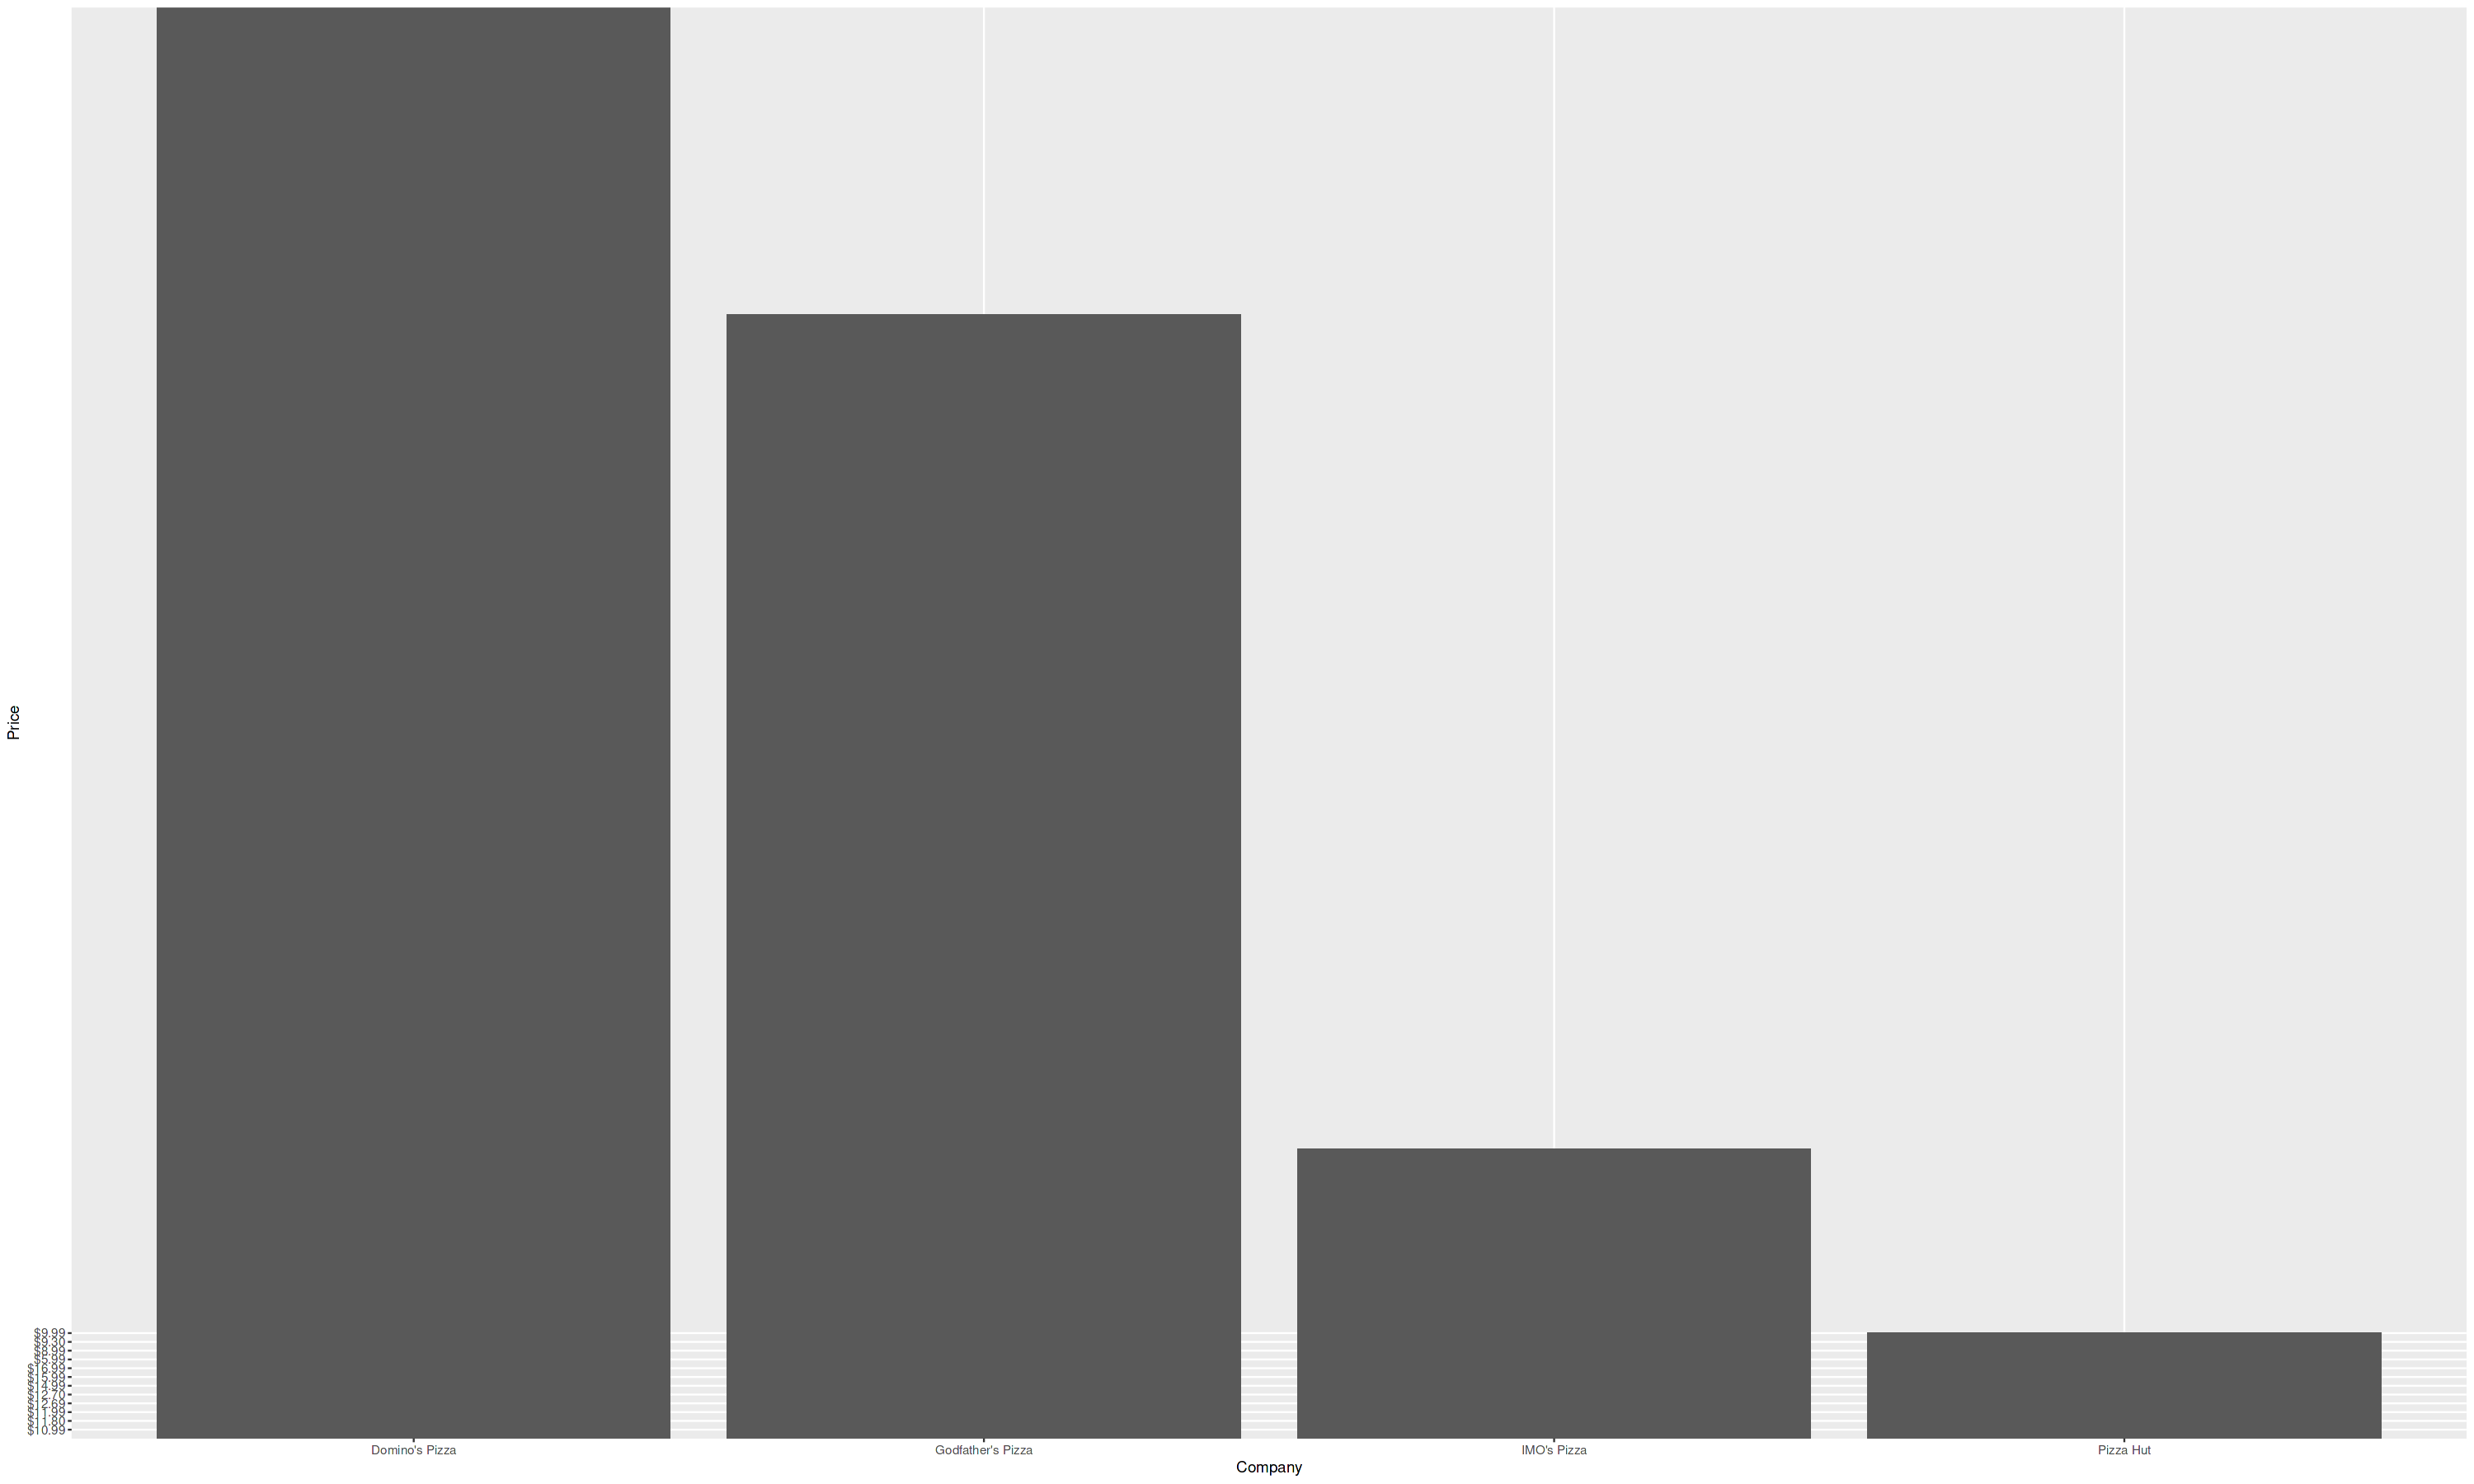

In [22]:
ggplot(Small_Pizza) + geom_col(aes(x=Company, y=Price))

This detaset is clean and ready for modelling. I might do a classification modelling on this dataset in the future.

Thank you for checking this project out.